Installing necessary packages:

```Julia
using Pkg

Pkg.add(["DataFrames", "Statistics", "CSV", "Plots", "StatsPlots"])
```

In [2]:
using DataFrames, Statistics, CSV, Plots, StatsPlots

In [4]:
df = CSV.read(pwd() * "/data_raw/init_res.csv", DataFrame)

describe(df)

Row,variable,mean,min,median,max,nmissing,eltype
,Symbol,Float64,Float64,Float64,Float64,Int64,DataType
1,actual,10388.0,9603.0,10386.0,11292.0,0,Float64
2,expected,10387.5,9510.32,10388.1,11058.1,0,Float64
3,glm_est,10125.9,7959.86,10113.9,12609.8,0,Float64
4,ols_est,10045.0,7744.76,10032.5,13860.3,0,Float64


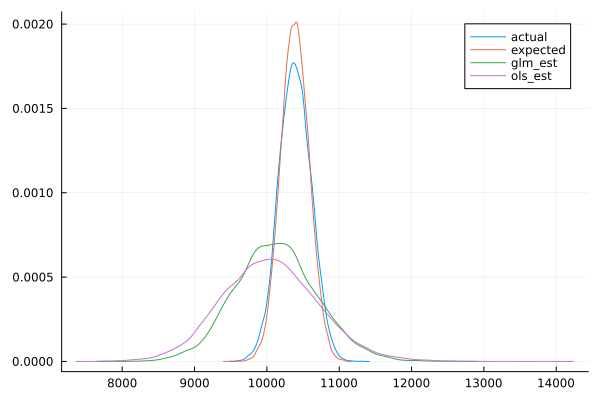

In [31]:
df_plot = stack(df, 1:4)

density(df_plot[:, :value], group = df_plot[:, :variable])

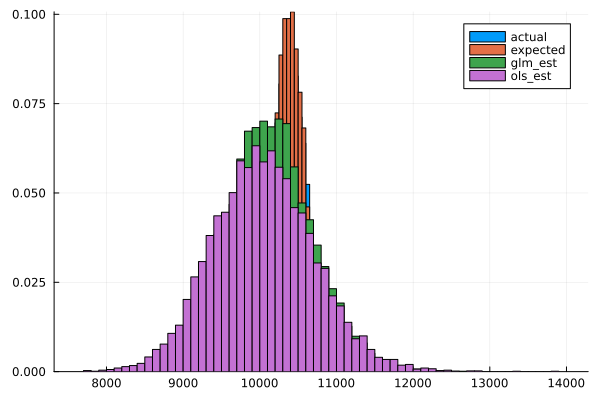

In [34]:
histogram(df_plot[:, :value], group = df_plot[:, :variable], bar_position = :stack; normalize=:probability)

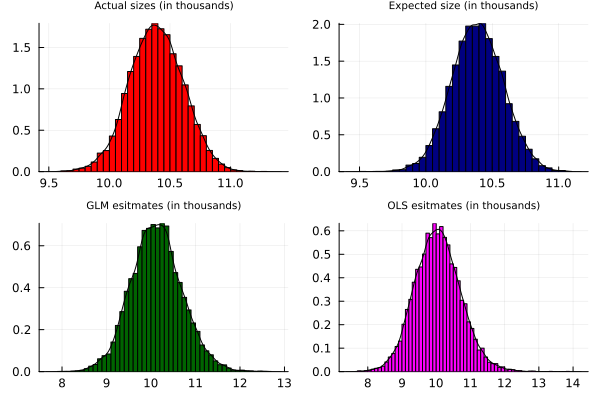

In [53]:
p1 = histogram(df[:, 1] / 1000, normalize = true, legend = false, colour = :red, title = "Actual sizes (in thousands)", titlefontsize = 7)
density!(df[:, 1] / 1000, legend = false, colour = :black)

p2 = histogram(df[:, 2] / 1000, normalize = true, legend = false, title = "Expected size (in thousands)", colour = :navy, titlefontsize = 7)
density!(df[:, 2] / 1000, legend = false, colour = :black)

p3 = histogram(df[:, 3] / 1000, normalize = true, legend = false, title = "GLM esitmates (in thousands)", colour = :darkgreen, titlefontsize = 7)
density!(df[:, 3] / 1000, legend = false, colour = :black)

p4 = histogram(df[:, 4] / 1000, normalize = true, legend = false, title = "OLS esitmates (in thousands)", colour = :magenta, titlefontsize = 7)
density!(df[:, 4] / 1000, legend = false, colour = :black)

plot(
    layout = [2, 2],
    p1, p2, p3, p4
)

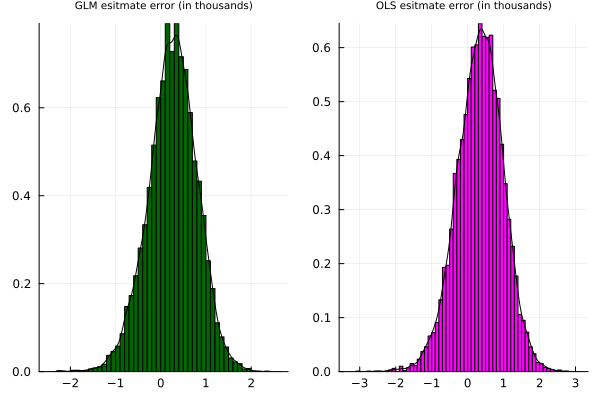

In [56]:
p1 = histogram((df[:, 2] - df[:, 3]) / 1000, normalize = true, legend = false, title = "GLM esitmate error (in thousands)", colour = :darkgreen, titlefontsize = 7)
density!((df[:, 2] - df[:, 3]) / 1000, legend = false, colour = :black)

p2 = histogram((df[:, 2] - df[:, 4]) / 1000, normalize = true, legend = false, title = "OLS esitmate error (in thousands)", colour = :magenta, titlefontsize = 7)
density!((df[:, 2] - df[:, 4]) / 1000, legend = false, colour = :black)

plot(
    p1, p2
)

### Higher population counts

In [74]:
df = CSV.read(pwd() * "/data_raw/init_res_1.csv", DataFrame)

describe(df)

Row,variable,mean,min,median,max,nmissing,eltype
,Symbol,Float64,Float64,Float64,Float64,Int64,DataType
1,actual,88736.7,85713.0,88732.0,91555.0,0,Float64
2,expected,88732.9,85565.2,88728.8,91598.5,0,Float64
3,glm_est,88611.7,76629.4,88608.6,1.02316e5,0,Float64
4,ols_est,88593.8,75254.9,88553.8,1.02756e5,0,Float64


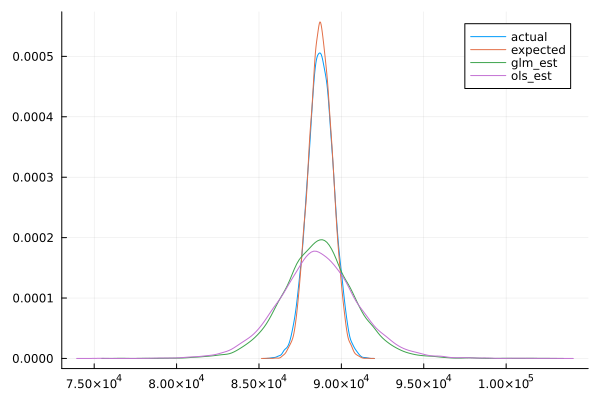

In [75]:
df_plot = stack(df, 1:4)

density(df_plot[:, :value], group = df_plot[:, :variable])

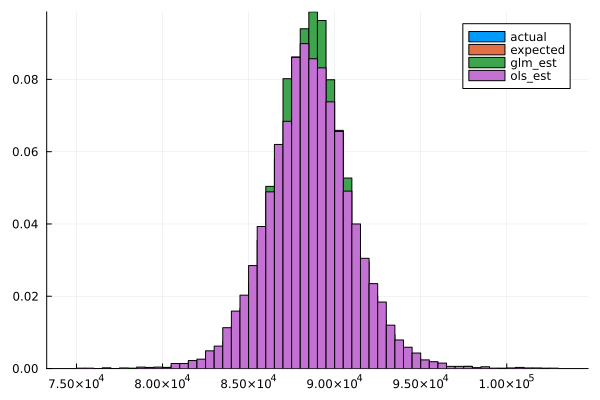

In [76]:
histogram(df_plot[:, :value], group = df_plot[:, :variable], bar_position = :stack; normalize=:probability)

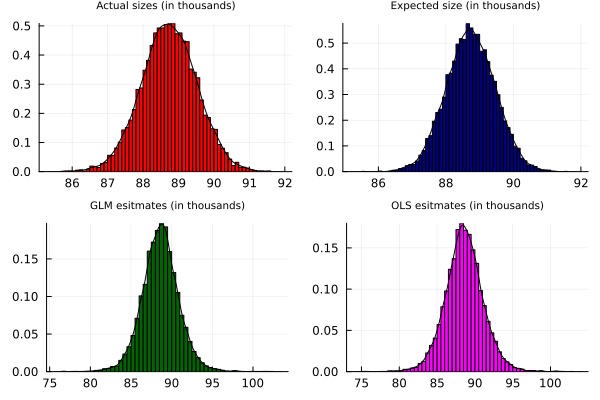

In [77]:
p1 = histogram(df[:, 1] / 1000, normalize = true, legend = false, colour = :red, title = "Actual sizes (in thousands)", titlefontsize = 7)
density!(df[:, 1] / 1000, legend = false, colour = :black)

p2 = histogram(df[:, 2] / 1000, normalize = true, legend = false, title = "Expected size (in thousands)", colour = :navy, titlefontsize = 7)
density!(df[:, 2] / 1000, legend = false, colour = :black)

p3 = histogram(df[:, 3] / 1000, normalize = true, legend = false, title = "GLM esitmates (in thousands)", colour = :darkgreen, titlefontsize = 7)
density!(df[:, 3] / 1000, legend = false, colour = :black)

p4 = histogram(df[:, 4] / 1000, normalize = true, legend = false, title = "OLS esitmates (in thousands)", colour = :magenta, titlefontsize = 7)
density!(df[:, 4] / 1000, legend = false, colour = :black)

plot(
    layout = [2, 2],
    p1, p2, p3, p4
)

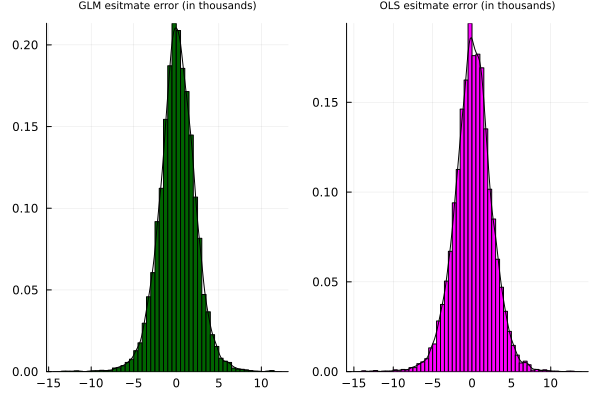

In [78]:
p1 = histogram((df[:, 2] - df[:, 3]) / 1000, normalize = true, legend = false, title = "GLM esitmate error (in thousands)", colour = :darkgreen, titlefontsize = 7)
density!((df[:, 2] - df[:, 3]) / 1000, legend = false, colour = :black)

p2 = histogram((df[:, 2] - df[:, 4]) / 1000, normalize = true, legend = false, title = "OLS esitmate error (in thousands)", colour = :magenta, titlefontsize = 7)
density!((df[:, 2] - df[:, 4]) / 1000, legend = false, colour = :black)

plot(
    p1, p2
)